In [5]:
%load_ext autoreload

In [7]:
%autoreload

import my_functions as mf
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use("seaborn-v0_8-darkgrid")

In [8]:
Y_train_a = pd.read_parquet('data/A/train_targets.parquet')
X_train_a = pd.concat([pd.read_parquet('data/A/X_train_observed.parquet'), pd.read_parquet('data/A/X_train_estimated.parquet').drop("date_calc", axis=1)])
X_test_a = pd.read_parquet('data/A/X_test_estimated.parquet').drop("date_calc", axis=1)

In [10]:
X_train_a.columns[X_train_a.isnull().any()]

Index(['ceiling_height_agl:m', 'cloud_base_agl:m', 'snow_density:kgm3'], dtype='object')

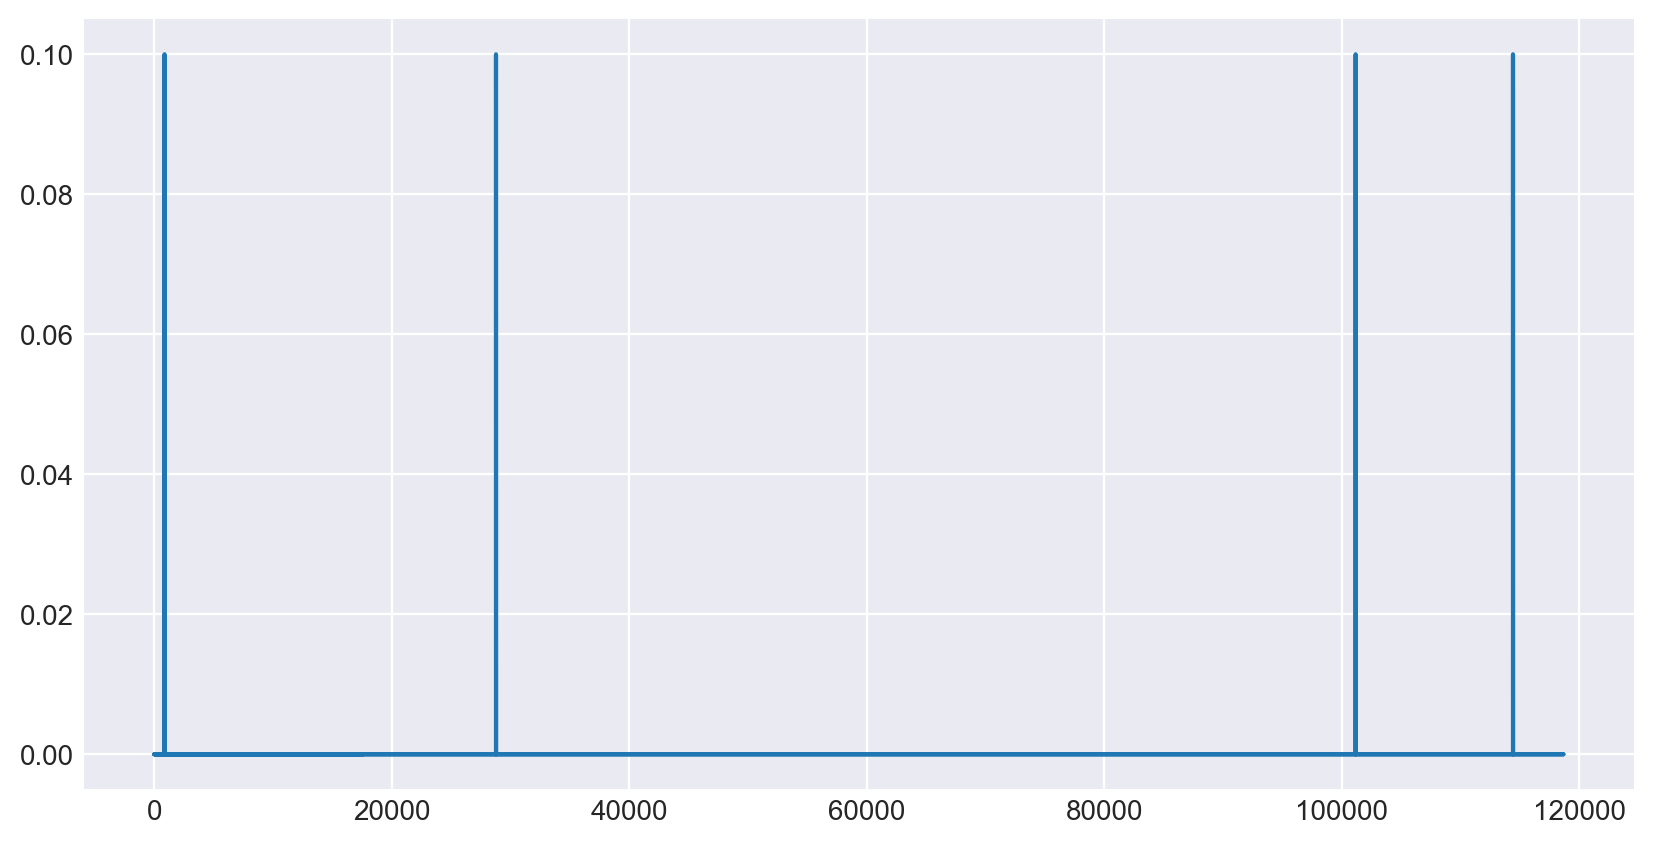

In [30]:
plt.plot(X_train_a["wind_speed_w_1000hPa:ms"])

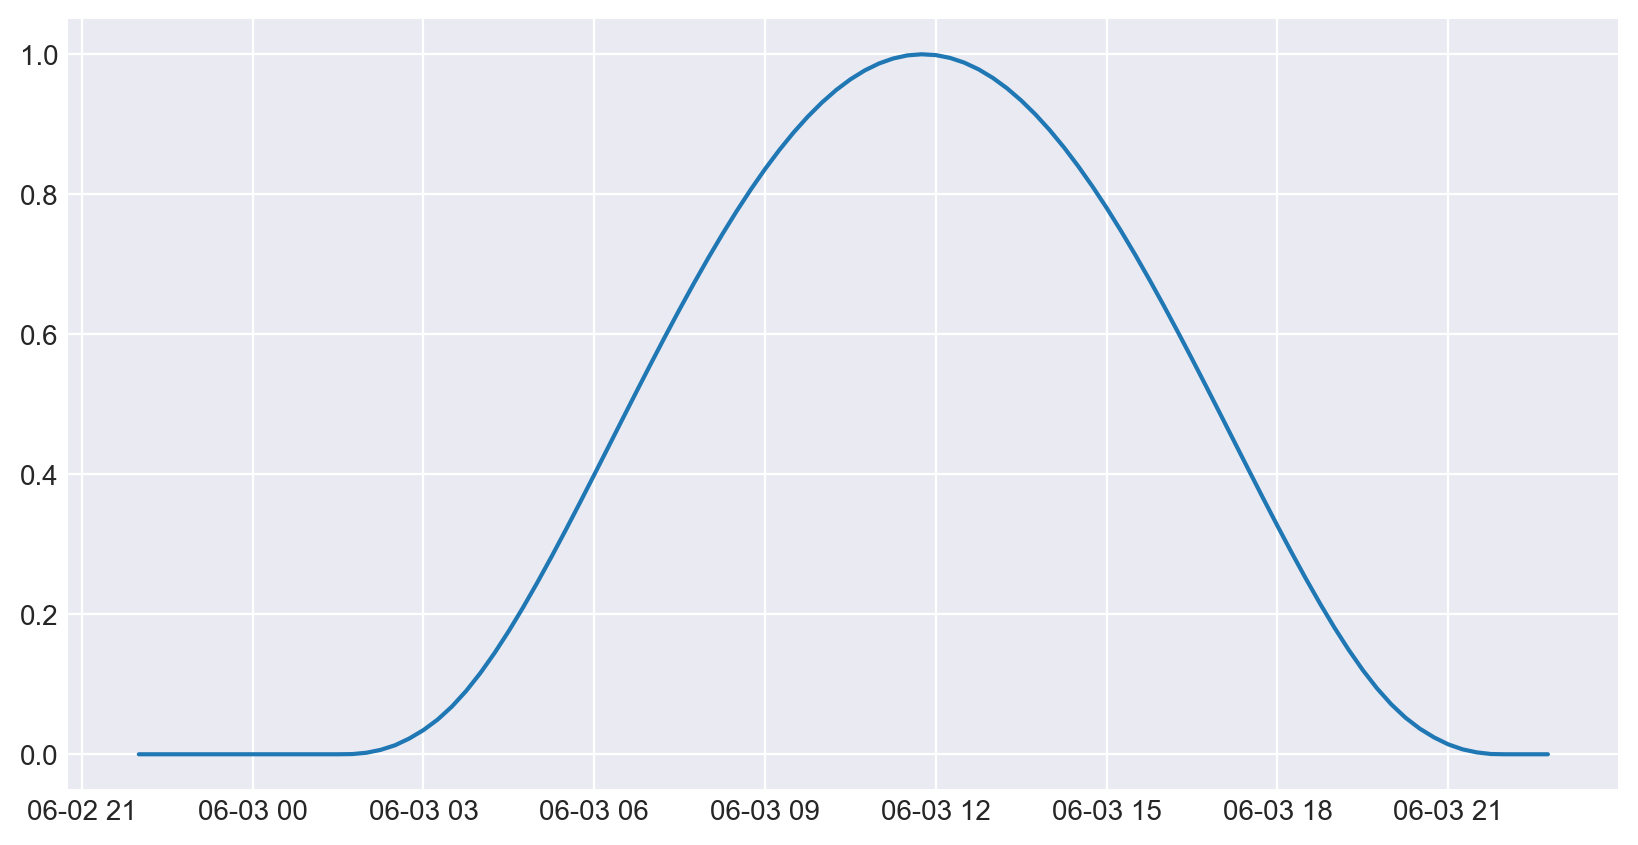

In [26]:
plt.plot(X_train_a["date_forecast"].iloc[:100], abs(X_train_a["clear_sky_energy_1h:J"].iloc[:100]/X_train_a["clear_sky_energy_1h:J"].iloc[:100].max()))

In [10]:
for i in range(1,len(X_train_a.columns)):
    print(i, len(X_train_a.iloc[:,i].unique()))

1 169
2 281
3 50272
4 73345
5 8346
6 40600
7 3
8 423
9 3064
10 73193
11 5997
12 64176
13 1001
14 1
15 115
16 37
17 137
18 68
19 93
20 2
21 2
22 915
23 74
24 7
25 909
26 913
27 525
28 13
29 777
30 920
31 2
32 61
33 1
34 15
35 46
36 112839
37 71102
38 15
39 445
40 1001
41 121137
42 125
43 191
44 167
45 2


In [23]:
import lightgbm
def check_gpu_support():
    try:
        data = np.random.rand(50, 2)
        label = np.random.randint(2, size=50)
        train_data = lightgbm.Dataset(data, label=label)
        params = {'num_iterations': 2, 'device': 'gpu'}
        gbm = lightgbm.train(params, train_set=train_data)
        return True
    except Exception as e:
        return False
check_gpu_support()

c:\Users\olara\anaconda3\envs\PyCaret\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 36
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 2
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 2 dense feature groups (0.00 MB) transferred to GPU in 0.000085 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.540000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


True